# KBS

In [1]:
from experta import *

In [2]:
class Age(Fact):
    pass

class Height(Fact):
    pass

class Weight(Fact):
    pass

class Gender(Fact):
    pass 
        
class Activity(Fact):
     pass
    
class Goal(Fact):
     pass

class BMR(Fact):
     pass
    
class ActivityCalorie(Fact):
     pass
        
class Calories(Fact):
    Daily     =  Field(float, default=0.0)
    Breakfast =  Field(float, default=0.0)    
    Lunch     =  Field(float, default=0.0)
    Dinner    =  Field(float, default=0.0) 
    meal      =  Field(float, default=0.0) 
        
class Fat(Fact): 
    Daily     = Field(tuple, default=(0.0, 0.0))
    Breakfast = Field(tuple, default=(0.0, 0.0))
    Lunch     = Field(tuple, default=(0.0, 0.0))
    Dinner    = Field(tuple, default=(0.0, 0.0))    
    meal      =  Field(float, default=0.0) 

        
class SaturatedFat(Fact):
    Daily     = Field(tuple, default=(0.0, 0.0))
    Breakfast = Field(tuple, default=(0.0, 0.0))
    Lunch     = Field(tuple, default=(0.0, 0.0))
    Dinner    = Field(tuple, default=(0.0, 0.0)) 
    meal      =  Field(float, default=0.0) 

        
class Cholesterol(Fact):
    Daily     = Field(tuple, default=(0.0, 300.0))
    Breakfast = Field(tuple, default=(0.0, 0.0))
    Lunch     = Field(tuple, default=(0.0, 0.0))
    Dinner    = Field(tuple, default=(0.0, 0.0))
    meal      =  Field(float, default=0.0) 

        
class Sodium(Fact):
    Daily     = Field(tuple, default=(1500.0, 2300.0))
    Breakfast = Field(tuple, default=(0.0, 0.0))
    Lunch     = Field(tuple, default=(0.0, 0.0))
    Dinner    = Field(tuple, default=(0.0, 0.0))
    meal      =  Field(float, default=0.0) 

        
class Carbohydrate(Fact):
    Daily     =  Field(tuple,  default=(0.0, 0.0))
    Breakfast =  Field(tuple,  default=(0.0, 0.0))    
    Lunch     =  Field(tuple,  default=(0.0, 0.0))    
    Dinner    =  Field(tuple,  default=(0.0, 0.0)) 
    meal      =  Field(float, default=0.0) 

        
class Fiber(Fact):
    Daily     =  Field(tuple,  default=(0.0, 0.0))
    Breakfast =  Field(tuple,  default=(0.0, 0.0))    
    Lunch     =  Field(tuple,  default=(0.0, 0.0))    
    Dinner    =  Field(tuple,  default=(0.0, 0.0))
    meal      =  Field(float, default=0.0) 

        
class Sugar(Fact):
    Daily     =  Field(tuple,  default=(0.0, 0.0))
    Breakfast =  Field(tuple,  default=(0.0, 0.0))    
    Lunch     =  Field(tuple,  default=(0.0, 0.0))    
    Dinner    =  Field(tuple,  default=(0.0, 0.0)) 
    meal      =  Field(float, default=0.0) 

        
class Protein(Fact):
    Daily     =  Field(tuple,  default=(0.0, 0.0))
    Breakfast =  Field(tuple,  default=(0.0, 0.0))    
    Lunch     =  Field(tuple,  default=(0.0, 0.0))    
    Dinner    =  Field(tuple,  default=(0.0, 0.0))
    meal      =  Field(float, default=0.0) 

               
class Vegetarian(Fact):
    pass

class Allergy(Fact):
    pass

class Diseases(Fact):
    pass

class Ask(Fact):
    pass


In [3]:
class SystemDiet(KnowledgeEngine):
                
        # Apply Activity Multiplier :
        #1)Sedentary (little or no exercise), 
        #2)Lightly active (light exercise/sports 1-3 days/week),
        #3)Moderately active (moderate exercise/sports 3-5 days/week)
        #4)Very active (hard exercise/sports 6-7 days a week),
        #5)Super active (very hard exercise, physical job, or training twice a day)
          
        
    @Rule(AS.f1 << Gender(MATCH.g),
          AS.f2 << Age(MATCH.a),
          AS.f3 << Height(MATCH.h),
          AS.f4 << Weight(MATCH.w))
    def Bmr(self, g, a, h, w):
        if(g == "male"):
            BMRFloat = float(88.362 + float( (13.397 *float(w) ) + (4.799 *float(h) ) - (5.677*float(a) ) ) )
            self.declare(BMR(BMRFloat))

        elif(g =="female"):
            BMRFloat = float( 447.593 + float( (9.247 *float(w) ) + (3.098 *float(h) ) - (4.330*float(a) ) ) )
            self.declare(BMR(BMRFloat))

        else:
            print("Invalid gender!") 
            
    
    @Rule(AS.f1 << Activity(MATCH.ac),
          AS.f2 << BMR(MATCH.b))
    def activity(self, ac, b):
        if(ac == "Sedentary"):
            caloriesFloat = float(1.2*float(b))
            self.declare(ActivityCalorie(caloriesFloat))
            
        elif(ac =="Lightly active"):
            caloriesFloat = float(1.375*float(b))
            self.declare(ActivityCalorie( caloriesFloat))
                                  
        elif(ac =="Moderately active"):
            caloriesFloat = float(1.55*float(b))
            self.declare(ActivityCalorie(caloriesFloat))
                                  
        elif(ac =="Very active"):
            caloriesFloat = float(1.725*float(b))
            self.declare(ActivityCalorie(caloriesFloat))
                                  
        elif(ac =="Super active"):
            caloriesFloat = float(1.9*float(b))
            self.declare(ActivityCalorie(caloriesFloat))
                                  
        else:
            print("Invalid answer!")
       
    #Calories
    @Rule(AS.f1 << Goal(MATCH.g),
          AS.f2 << ActivityCalorie(MATCH.c),
          AS.f3 << Diseases(MATCH.des))
    def goal(self, g, c, des):
        if(g == "Weight Loss"):
            lossFloat = float(float(c)-(float(c)*0.15))
            
            for d in des:
                if d == "Liver Disease":
                    # Adjust other nutrient ratios for liver disease if needed
                    lossFloat *= 0.85
                    pass 
                
            breakfast_calories = float(lossFloat * 0.35)
            lunch_calories     = float(lossFloat * 0.30)
            dinner_calories    = float(lossFloat * 0.35)                  
            self.declare(Calories(Daily=lossFloat, Breakfast=breakfast_calories, Lunch=lunch_calories, Dinner=dinner_calories))

        elif(g =="Maintenance"):
            breakfast_calories = float(float(c) * 0.30)
            lunch_calories     = float(float(c) * 0.35)
            dinner_calories    = float(float(c) * 0.35)   
            self.declare(Calories(Daily=float(c), Breakfast=breakfast_calories, Lunch=lunch_calories, Dinner=dinner_calories))

        elif(g =="Weight Gain"):
            gainFloat = float(float(c)+(float(c)*0.075))
            
            for d in des:
                if d == "Liver Disease":
                    # Adjust other nutrient ratios for liver disease if needed
                    gainFloat *= 0.85
                    pass
                
            breakfast_calories = float(gainFloat * 0.30)
            lunch_calories     = float(gainFloat * 0.35)
            dinner_calories    = float(gainFloat * 0.35)                     
            self.declare(Calories(Daily=gainFloat, Breakfast=breakfast_calories, Lunch=lunch_calories, Dinner=dinner_calories))

        elif(g =="Muscle Gain"):
            gainFloat = float(float(c)+(float(c)*0.1))
            
            for d in des:
                if d == "Liver Disease":
                    # Adjust other nutrient ratios for liver disease if needed
                    gainFloat *= 0.85
                    pass
                
            breakfast_calories  = float(gainFloat * 0.25)
            lunch_calories      = float(gainFloat * 0.35)
            dinner_calories     = float(gainFloat * 0.40)                 
            self.declare(Calories(Daily=gainFloat, Breakfast=breakfast_calories, Lunch=lunch_calories, Dinner=dinner_calories))

        else:
            print("Invalid goal!") 
            
       
    #Protein
    @Rule(AS.f1 << Weight(MATCH.w),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def protein(self, w, g, des):
        
        breakfast_percentage = 0.25
        lunch_percentage = 0.35
        dinner_percentage = 0.40
        
        if g == "Weight Loss":
            protein_range = (float(float(w) * 1.2), float(float(w) * 1.5))
               
        elif g == "Weight Gain":
            protein_range = (float(float(w) * 1.2), float(float(w) * 1.5))
           
        elif g == "Muscle Gain":
            protein_range = (float(float(w) * 1.6), float(float(w) * 2.0))
              
        elif g == "Maintenance":
            protein_range = (float(float(w) * 1.0), float(float(w) * 1.2))
            
            
        for d in des:
#             if d == "Diabetes":
#                 # Adjust other nutrient ratios for Diabetes if needed

#             if d == "Heart Disease":
#                 # Adjust other nutrient ratios for Diabetes if needed
                
            if d == "Liver Disease":
                # Modify protein content based on liver disease guidelines
                protein_range = list(protein_range)  # Convert tuple to list
                protein_range[0] *= 0.9
                protein_range[1] *= 0.9
                protein_range = tuple(protein_range) 
                pass 
            
            
        breakfast_protein = (protein_range[0] * breakfast_percentage, protein_range[1] * breakfast_percentage)
        lunch_protein     = (protein_range[0] * lunch_percentage, protein_range[1] * lunch_percentage)
        dinner_protein    = (protein_range[0] * dinner_percentage, protein_range[1] * dinner_percentage)
        self.declare(Protein(Daily=protein_range,Breakfast=breakfast_protein, Lunch=lunch_protein, Dinner=dinner_protein))
          
            
    
    #Carbohydrate
    @Rule(AS.f1 << Calories(Daily=MATCH.c),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def Carbohydrates(self, c, g, des):
        carbohydrates_ratio_range = (float(c) * 0.45, float(c) * 0.65)
        
        for d in des:
            if d == "Diabetes":
                # You might reduce the total carbohydrate content or focus on complex carbohydrates
                carbohydrates_ratio_range = list(carbohydrates_ratio_range)  # Convert tuple to list
                carbohydrates_ratio_range[0] *= 0.75
                carbohydrates_ratio_range[1] *= 0.75
                carbohydrates_ratio_range = tuple(carbohydrates_ratio_range) 
                
#             if d == "Heart Disease":
#                 # Adjust other nutrient ratios for heart disease if needed

            if d == "Liver Disease":
                # You might reduce the total carbohydrate content or focus on complex carbohydrates
                carbohydrates_ratio_range = list(carbohydrates_ratio_range)  # Convert tuple to list
                carbohydrates_ratio_range[0] *= 0.8
                carbohydrates_ratio_range[1] *= 0.8
                carbohydrates_ratio_range = tuple(carbohydrates_ratio_range) 
        
      
            
        carbohydrates_range = (carbohydrates_ratio_range[0] / 4, carbohydrates_ratio_range[1] / 4)
        
        if g == "Weight Gain":
            breakfast_percentage = 0.30
            lunch_percentage = 0.35
            dinner_percentage = 0.35
        elif g == "Weight Loss":
            breakfast_percentage = 0.35
            lunch_percentage = 0.30
            dinner_percentage = 0.35
        elif g == "Muscle Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.35
            dinner_percentage = 0.40
        elif g == "Maintenance":
            breakfast_percentage = 0.30
            lunch_percentage = 0.35
            dinner_percentage = 0.35

        breakfast_carbohydrates = (round(carbohydrates_range[0] * breakfast_percentage , 2) , round(carbohydrates_range[1] * breakfast_percentage , 2) )
        lunch_carbohydrates = (round(carbohydrates_range[0] * lunch_percentage , 2) , round(carbohydrates_range[1] * lunch_percentage , 2) )
        dinner_carbohydrates = (round(carbohydrates_range[0] * dinner_percentage , 2) , round(carbohydrates_range[1] * dinner_percentage, 2) )
        daily_carbohydrates = (round(carbohydrates_range[0]  , 2) , round(carbohydrates_range[1] , 2) )

        self.declare(Carbohydrate(Daily=daily_carbohydrates,Breakfast=breakfast_carbohydrates,Lunch=lunch_carbohydrates, Dinner=dinner_carbohydrates))
      

     
    #Fat
    @Rule(AS.f1 << Calories(Daily=MATCH.c),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def fat(self, c, g, des):
        fat_ratio_range = (float(float(c)*0.2), float(float(c)*0.35))
            
        for d in des:
#             if d == "Diabetes":
#                 # Adjust other nutrient ratios for Diabetes if needed

            if d == "Heart Disease":
                # Modify fat content based on heart disease guidelines
                fat_ratio_range = list(fat_ratio_range)  # Convert tuple to list
                fat_ratio_range[0] *= 0.8
                fat_ratio_range[1] *= 0.8
                fat_ratio_range = tuple(fat_ratio_range) 
                
#             if d == "Liver Disease":
#                 # Adjust other nutrient ratios for liver disease if needed
            
        fat_range = (float(fat_ratio_range[0]/9), float(fat_ratio_range[1]/9))
        
        if g == "Weight Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.35
            dinner_percentage = 0.40
        elif g == "Weight Loss":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
        elif g == "Muscle Gain":
            breakfast_percentage = 0.20
            lunch_percentage = 0.30
            dinner_percentage = 0.35
        elif g == "Maintenance":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30   
        

        breakfast_fat = (round(fat_range[0] * breakfast_percentage, 2), round(fat_range[1] * breakfast_percentage, 2) )
        lunch_fat = (round(fat_range[0] * lunch_percentage, 2) ,round( fat_range[1] * lunch_percentage, 2))
        dinner_fat = (round(fat_range[0] * dinner_percentage, 2) ,round( fat_range[1] * dinner_percentage, 2))
        daily_fat = (round(fat_range[0], 2) ,round(fat_range[1], 2) )

        self.declare(Fat(Daily=daily_fat,Breakfast=breakfast_fat, Lunch=lunch_fat, Dinner=dinner_fat))
        
        
            
        
    #SaturatedFat   
    @Rule(AS.f1 << Calories(Daily=MATCH.c),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def saturatedFat(self, c ,g, des):
        saturatedFat_range = (float(float(c) * 0.05 / 9), float(float(c) * 0.06 / 9))
        
        
        for d in des:
#             if d == "Diabetes":
#                 # Adjust other nutrient ratios for Diabetes if needed

            if d == "Heart Disease":
                # Modify saturated fat content based on heart disease guidelines
                saturatedFat_range = list(saturatedFat_range)  # Convert tuple to list
                saturatedFat_range[0] *= 0.7
                saturatedFat_range[1] *= 0.7
                saturatedFat_range = tuple(saturatedFat_range) 
                
#             if d == "Liver Disease":
#                 # Adjust other nutrient ratios for liver disease if needed
            
        
        if g == "Weight Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.35
            dinner_percentage = 0.40
        elif g == "Weight Loss":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
        elif g == "Muscle Gain":
            breakfast_percentage = 0.20
            lunch_percentage = 0.30
            dinner_percentage = 0.35
        elif g == "Maintenance":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
            
        breakfast_saturatedFat = (round(saturatedFat_range[0] * breakfast_percentage, 2) ,round( saturatedFat_range[1] * breakfast_percentage, 2) )
        lunch_saturatedFat = (round(saturatedFat_range[0] * lunch_percentage, 2) , round(saturatedFat_range[1] * lunch_percentage, 2) )
        dinner_saturatedFat = (round(saturatedFat_range[0] * dinner_percentage, 2) , round(saturatedFat_range[1] * dinner_percentage, 2) )
        daily_saturatedFat = (round(saturatedFat_range[0], 2) , round(saturatedFat_range[1], 2) )

        self.declare(SaturatedFat(Daily=daily_saturatedFat,Breakfast=breakfast_saturatedFat, Lunch=lunch_saturatedFat, Dinner=dinner_saturatedFat))
        
        
     
                              
    #Sugar                         
    @Rule(AS.f1 << Calories(Daily=MATCH.c),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def sugar(self, c, g, des):
        sugar_range = (float(float(c) * 0.05 / 4), float(float(c) * 0.1 / 4))
        
        if g == "Weight Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.35
            dinner_percentage = 0.40
        elif g == "Weight Loss":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
        elif g == "Muscle Gain":
            breakfast_percentage = 0.20
            lunch_percentage = 0.30
            dinner_percentage = 0.35
        elif g == "Maintenance":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
            
            
        for d in des:
            if d == "Diabetes":
                # Reduce sugar content to manage blood sugar levels
                sugar_range = list(sugar_range)  # Convert tuple to list
                sugar_range[0] *= 0.5
                sugar_range[1] *= 0.5
                sugar_range = tuple(sugar_range) 

#             if d == "Heart Disease":
#                 # Adjust other nutrient ratios for heart disease if needed
          
#             if d == "Liver Disease":
#                 # Adjust other nutrient ratios for liver disease if needed
            

        breakfast_sugar = (round(sugar_range[0] * breakfast_percentage, 2) , round(sugar_range[1] * breakfast_percentage, 2) )
        lunch_sugar = (round(sugar_range[0] * lunch_percentage, 2) , round(sugar_range[1] * lunch_percentage, 2) )
        dinner_sugar = (round(sugar_range[0] * dinner_percentage, 2) , round(sugar_range[1] * dinner_percentage, 2) )
        daily_sugar = (round(sugar_range[0], 2) , round(sugar_range[1] , 2) )
        
        self.declare(Sugar(Daily=daily_sugar,Breakfast=breakfast_sugar, Lunch=lunch_sugar, Dinner=dinner_sugar))
                              
      
    #Fiber
    @Rule(AS.f1 << Age(MATCH.a),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def fiber(self, a ,g, des):
        
        if g == "Weight Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.35
            dinner_percentage = 0.40
        elif g == "Weight Loss":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
        elif g == "Muscle Gain":
            breakfast_percentage = 0.20
            lunch_percentage = 0.30
            dinner_percentage = 0.35
        elif g == "Maintenance":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.30
            
            
        if int(a) >= 50:
            daily_fiber_range = (21.0, 30.0)

        elif int(a) < 50:
            daily_fiber_range = (25.0, 38.0)
            
            
        for d in des:
            if d == "Diabetes":
                # Increase fiber content for better blood sugar control
                daily_fiber_range = list(daily_fiber_range)  # Convert tuple to list
                daily_fiber_range[0] *= 1.2
                daily_fiber_range[1] *= 1.2
                daily_fiber_range = tuple(daily_fiber_range) 
                
#             if d == "Heart Disease":
#                 # Adjust other nutrient ratios for heart disease if needed

#           if d == "Liver Disease":
#                 # Adjust other nutrient ratios for liver disease if needed
        
            
        breakfast_fiber = (daily_fiber_range[0] * breakfast_percentage, daily_fiber_range[1] * breakfast_percentage)
        lunch_fiber = (daily_fiber_range[0] * lunch_percentage, daily_fiber_range[1] * lunch_percentage)
        dinner_fiber = (daily_fiber_range[0] * dinner_percentage, daily_fiber_range[1] * dinner_percentage)
        self.declare(Fiber(Daily=daily_fiber_range, Breakfast=breakfast_fiber, Lunch=lunch_fiber, Dinner=dinner_fiber))

           
       
    #Sodium
    @Rule(AS.f1 << Calories(Daily=MATCH.c),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def sodium(self, c ,g, des):
        sodium_range = (1500.0, 2300.0) 
        
        for d in des:
#             if d == "Diabetes":
#                 # Adjust other nutrient ratios for Diabetes if needed

            if d == "Heart Disease":
                # Modify sodium content based on heart disease guidelines
                sodium_range = list(sodium_range)  # Convert tuple to list
                sodium_range[0] *= 0.6
                sodium_range[1] *= 0.6
                sodium_range = tuple(sodium_range) 


#             if d == "Liver Disease":
#                 # Adjust other nutrient ratios for liver disease if needed
            
        
        if g == "Weight Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.45
        elif g == "Weight Loss":
            breakfast_percentage = 0.30
            lunch_percentage = 0.30
            dinner_percentage = 0.40
        elif g == "Muscle Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.35
            dinner_percentage = 0.40
        elif g == "Maintenance":
            breakfast_percentage = 0.30
            lunch_percentage = 0.30
            dinner_percentage = 0.40
            
        breakfast_sodium = (sodium_range[0] * breakfast_percentage, sodium_range[1] * breakfast_percentage)
        lunch_sodium     = (sodium_range[0] * lunch_percentage, sodium_range[1] * lunch_percentage)
        dinner_sodium    = (sodium_range[0] * dinner_percentage, sodium_range[1] * dinner_percentage)

        self.declare(Sodium(Breakfast=breakfast_sodium, Lunch=lunch_sodium, Dinner=dinner_sodium))
                 
       
    #Cholesterol
    @Rule(AS.f1 << Calories(Daily=MATCH.c),
          AS.f2 << Goal(MATCH.g),
          AS.f3 << Diseases(MATCH.des))
    def cholesterol(self, c ,g, des):
        cholesterol_range = (0.0, 300.0)
        
        for d in des:
#             if d == "Diabetes":
#                 # Adjust other nutrient ratios for Diabetes if needed

            if d == "Heart Disease":
                # Modify cholesterol content based on heart disease guidelines
                cholesterol_range = list(cholesterol_range)  # Convert tuple to list
                cholesterol_range[0] *= 0.5
                cholesterol_range[1] *= 0.5
                cholesterol_range = tuple(cholesterol_range) 

          
#             if d == "Liver Disease":
#                 # Adjust other nutrient ratios for liver disease if needed
                 
        
        if g == "Weight Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.25
            dinner_percentage = 0.50
        elif g == "Weight Loss":
            breakfast_percentage = 0.30
            lunch_percentage = 0.35
            dinner_percentage = 0.35
        elif g == "Muscle Gain":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.45
        elif g == "Maintenance":
            breakfast_percentage = 0.25
            lunch_percentage = 0.30
            dinner_percentage = 0.45
        
        breakfast_cholesterol = (cholesterol_range[0] * breakfast_percentage, cholesterol_range[1] * breakfast_percentage)
        lunch_cholesterol = (cholesterol_range[0] * lunch_percentage, cholesterol_range[1] * lunch_percentage)
        dinner_cholesterol = (cholesterol_range[0] * dinner_percentage, cholesterol_range[1] * dinner_percentage)

        self.declare(Cholesterol(Breakfast=breakfast_cholesterol, Lunch=lunch_cholesterol, Dinner=dinner_cholesterol))
        
        
        
    def init(self):
        super().init()
        self.result = None

    
            
    @Rule(Gender(MATCH.gen),
          Age(MATCH.a),
          Weight(MATCH.w),
          BMR(MATCH.b),
          Activity(MATCH.ac),
          Goal(MATCH.g),
          Vegetarian(MATCH.veg),
          Allergy(MATCH.alle),
          Diseases(MATCH.des),
          Calories(Daily=MATCH.cc,
                   Breakfast=MATCH.cbf,
                   Lunch = MATCH.cl,
                   Dinner = MATCH.cd),
          Protein(Daily=MATCH.p,
                   Breakfast=MATCH.pb,
                   Lunch = MATCH.pl,
                   Dinner = MATCH.pd),
          Carbohydrate(Daily=MATCH.carb,
                       Breakfast=MATCH.carbf,
                       Lunch = MATCH.carbl,
                       Dinner = MATCH.carbi),
         Fat(Daily=MATCH.f,
                       Breakfast=MATCH.fbf,
                       Lunch = MATCH.fal,
                       Dinner = MATCH.fad),
         SaturatedFat(Daily=MATCH.sf,
                       Breakfast=MATCH.sfb,
                       Lunch = MATCH.sfl,
                       Dinner = MATCH.sfd),
         Sugar(Daily=MATCH.su,
                       Breakfast=MATCH.sub,
                       Lunch = MATCH.sul,
                       Dinner = MATCH.sud),
         Fiber(Daily=MATCH.fd,
                       Breakfast=MATCH.fb,
                       Lunch = MATCH.fl,
                       Dinner = MATCH.fdi),
         Sodium(Daily=MATCH.sd,
                       Breakfast=MATCH.sb,
                       Lunch = MATCH.sl,
                       Dinner = MATCH.sdi),
         Cholesterol(Daily=MATCH.chd,
                       Breakfast=MATCH.chb,
                       Lunch = MATCH.chl,
                       Dinner = MATCH.chdi),)
    def capture_result(self, gen, a,w,b,cc,cbf,cl,cd,ac, g, veg, alle,des, p,pb,pl,pd,carb,carbf,carbl,carbi,f,fbf,fal,fad,sf,sfb,sfl,sfd,su,sub,sul,sud,fd,fb,fl,fdi,sd,sb,sl,sdi,chd,chl,chb,chdi):
        
        
        self.result = {
            "gender": gen,
            "age": a,
            "goal": g,
            "weight":w,
            "BMR": round(b, 2),
            "vegetarian": veg,            
            "allergy": alle,
            "Diseases": des,
            "daily":
            {
                "name":"daily",
                "calories": round(cc, 2),
                "Protein": p,
                "Carbohydrate": carb,
                "fat": f,
                "SaturatedFat": sf,
                "Sugar": su,
                "Fiber": fd,
                "Sodium": sd,
                "Cholesterol": chd,           
            },
            "meal" : [
            {
                "name":"Breakfast",
                "calories": round(cbf, 2),
                "Protein": pb,
                "Carbohydrate": carbf,
                "fat": fbf,
                "SaturatedFat": sfb,
                "Sugar": sub,
                "Fiber": fb,
                "Sodium": sb,
                "Cholesterol": chb,           
            },
    
            {
                "name":"Lunch",
                "calories": round(cl, 2),
                "Protein": pl,
                "Carbohydrate": carbl,
                "fat": fal,
                "SaturatedFat": sfl,
                "Sugar": sul,
                "Fiber": fl,
                "Sodium": sl,
                "Cholesterol": chl,           
            },
           
            {
                "name":"Dinner",
                "calories": round(cd, 2),
                "Protein": pd,
                "Carbohydrate": carbi,
                "fat": fad,
                "SaturatedFat": sfd,
                "Sugar": sud,
                "Fiber": fdi,
                "Sodium": sdi,
                "Cholesterol": chdi,           
            },
            ],
            
            
            "daily calories": cc,
            "Breakfast calories": cbf,
            "Lunch calories": cl,
            "Dinner calories": cd,
            
            "daily Protein": p,
            "Breakfast Protein": pb,
            "Lunch Protein": pl,
            "Dinner Protein": pd,
            
            "daily Carbohydrate": carb,
            "Breakfast Carbohydrate": carbf,
            "Lunch Carbohydrate": carbl,
            "Dinner Carbohydrate": carbi,
            
            "daily fat": f,
            "Breakfast fat": fbf,
            "Lunch fat": fal,
            "Dinner fat": fad,
            
            "daily SaturatedFat": sf,
            "Breakfast SaturatedFat": sfb,
            "Lunch SaturatedFat": sfl,
            "Dinner SaturatedFat": sfd,
            
            "daily Sugar": su,
            "Breakfast Sugar": sub,
            "Lunch Sugar": sul,
            "Dinner Sugar": sud,
            
            "daily Fiber": fd,
            "Breakfast Fiber": fb,
            "Lunch Fiber": fl,
            "Dinner Fiber": fdi,

            "daily Sodium": sd,
            "Breakfast Sodium": sb,
            "Lunch Sodium": sl,
            "Dinner Sodium": sdi,
            
            "daily Cholesterol": chd,
            "Breakfast Cholesterol": chb,
            "Lunch Cholesterol": chl,
            "Dinner Cholesterol": chdi, 

        }
       
        
                              

In [4]:
engine = SystemDiet()
engine.reset()
engine.run()

# Getting the Data

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('data/foodcom-recipes-and-reviews/recipes.csv')

In [7]:
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


# Exploring the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

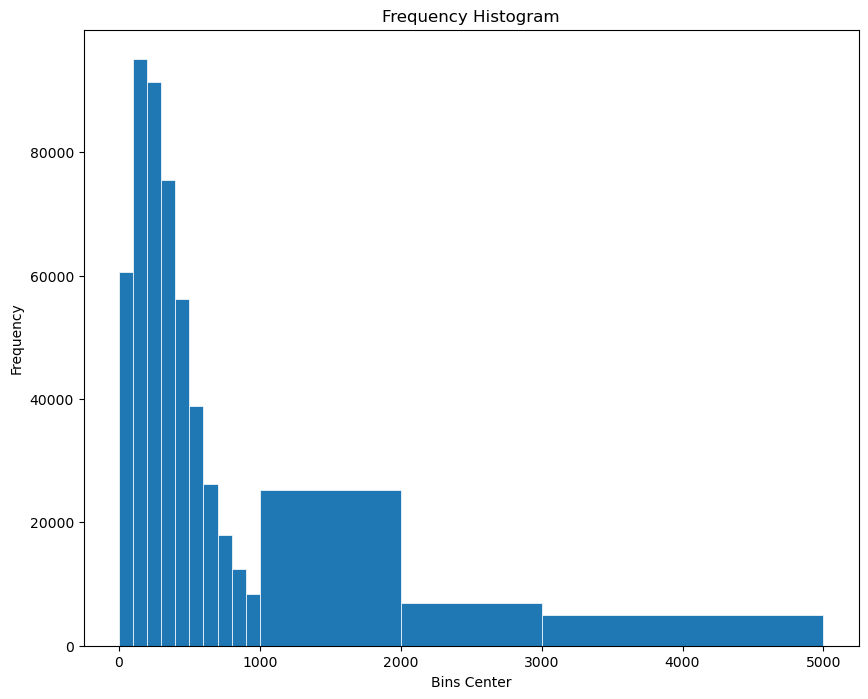

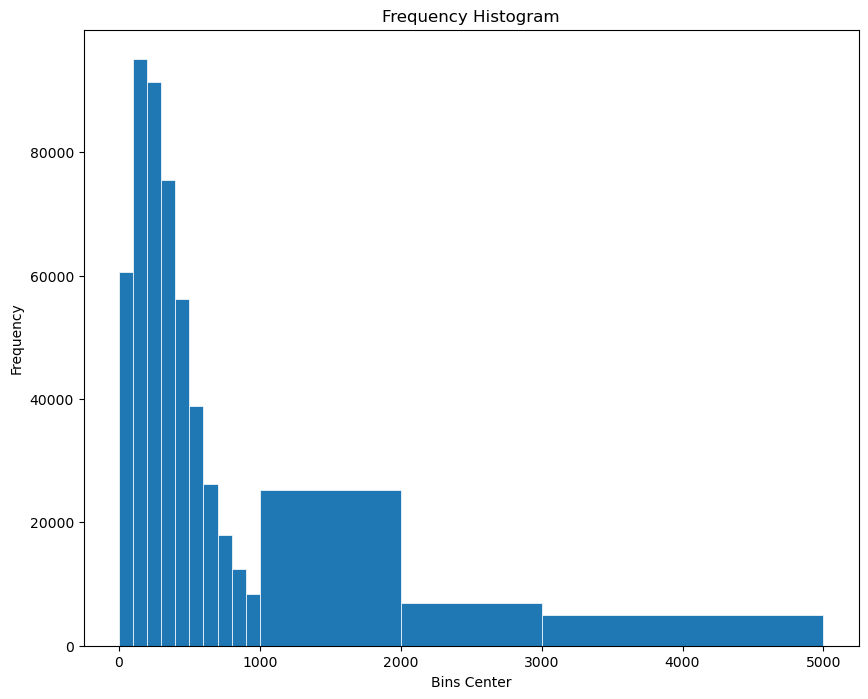

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

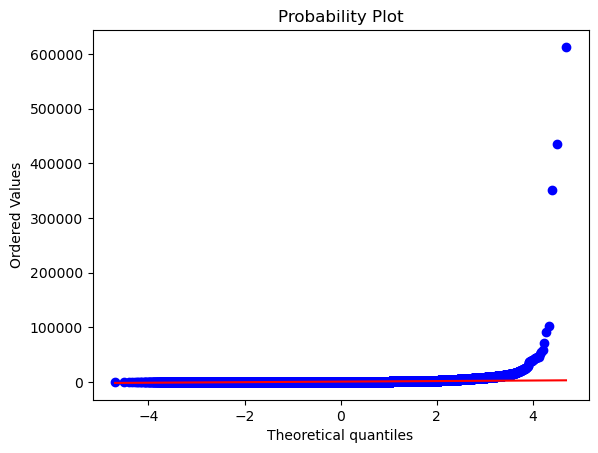

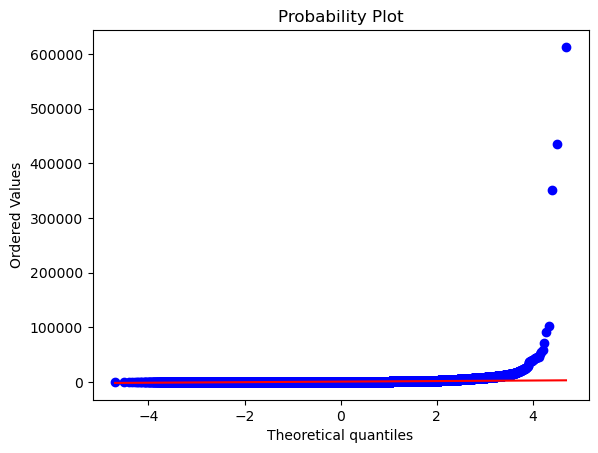

In [10]:
import pylab 
import scipy.stats as stats
stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

# Preparing the Data 

**We start by extracting the columns that we are interessted in. Since we are building a recommendation engine that takes the recipes nutritional characteristics, we start by extracting a sub data with the relevant columns. We may still need other columns for our project. However, we will mainly use the columns with nutritional information for trainning our model.** 

In [11]:
dataset=data.copy()
columns=['RecipeId','Name', 'CookTime','PrepTime','TotalTime', 'Images', 'RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent', 'Description','RecipeInstructions']
dataset=dataset[columns]

In [12]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [13]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[7:16],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [14]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375703 entries, 0 to 522515
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               313207 non-null  object 
 3   PrepTime               375703 non-null  object 
 4   TotalTime              375703 non-null  object 
 5   Images                 375703 non-null  object 
 6   RecipeIngredientParts  375703 non-null  object 
 7   Calories               375703 non-null  float64
 8   FatContent             375703 non-null  float64
 9   SaturatedFatContent    375703 non-null  float64
 10  CholesterolContent     375703 non-null  float64
 11  SodiumContent          375703 non-null  float64
 12  CarbohydrateContent    375703 non-null  float64
 13  FiberContent           375703 non-null  float64
 14  SugarContent           375703 non-nu

In [15]:
extracted_data.iloc[:,7:16].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,7:16].to_numpy())

In [17]:
prep_data

array([[-0.55093359, -0.91281917, -0.77924852, ...,  0.15672078,
         2.35502102, -0.68338127],
       [ 1.47428542,  1.13139595, -0.0647135 , ...,  3.91055068,
         2.56324444,  1.25158691],
       [-0.92414618, -1.11248669, -1.12222533, ...,  0.4855234 ,
         0.98513013, -0.60183088],
       ...,
       [ 0.49162165,  0.73206091,  1.85024037, ..., -0.61048534,
         1.76322815, -0.56476253],
       [ 0.25704672,  0.03797856,  1.02137974, ..., -0.61048534,
         1.54404561, -0.63148557],
       [-1.40937801, -1.09347074, -1.12222533, ..., -0.82968708,
        -0.94367625, -0.74269064]])

array([[-0.55093359, -0.91281917, -0.77924852, ...,  0.15672078,
         2.35502102, -0.68338127],
       [ 1.47428542,  1.13139595, -0.0647135 , ...,  3.91055068,
         2.56324444,  1.25158691],
       [-0.92414618, -1.11248669, -1.12222533, ...,  0.4855234 ,
         0.98513013, -0.60183088],
       ...,
       [ 0.49162165,  0.73206091,  1.85024037, ..., -0.61048534,
         1.76322815, -0.56476253],
       [ 0.25704672,  0.03797856,  1.02137974, ..., -0.61048534,
         1.54404561, -0.63148557],
       [-1.40937801, -1.09347074, -1.12222533, ..., -0.82968708,
        -0.94367625, -0.74269064]])

# Trainning the model

## Fitting the model

In [18]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [20]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [21]:
pipeline.transform(extracted_data.iloc[0:1,7:16].to_numpy())[0]

array([     0, 333440, 349044, 109248,  19679, 156831, 144322, 301119,
       262699, 332342], dtype=int64)

array([     0, 333440, 349044, 109248,  19679, 156831, 144322, 301119,
       262699, 332342], dtype=int64)

## Testing the model

In [22]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,7:16].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,Description,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,Make and share this Low-Fat Berry Blue Frozen ...,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,character(0),"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,This salsa is extremely easy to make and great...,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,Make and share this Glazed Pineapple With Cinn...,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,character(0),"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,Make and share this Lemon Float Punch recipe f...,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,character(0),"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"On June 22nd, 2002, we were feeling creative a...","c(""Blend the frozen strawberries, ice cubes, y..."
224062,233508,Blueberry Mango Smoothie,NaN,PT5M,PT5M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""vanilla-flavored soymilk"", ""frozen blueberr...",147.5,0.4,0.1,0.0,2.9,39.5,4.2,34.9,0.9,Make and share this Blueberry Mango Smoothie r...,"""Place all ingredients in a blender. Blend un..."
206883,215824,Blueberry Orange Smoothie,NaN,PT5M,PT5M,character(0),"c(""blueberries"", ""fresh blueberries"")",179.4,2.6,1.3,0.7,34.3,38.1,3.0,30.4,3.1,Make and share this Blueberry Orange Smoothie ...,"c(""Combine first 5 ingredients in blender."", ""..."
419537,434977,Preserved Apple Pie Filling,PT30M,PT1H,PT1H30M,character(0),"c(""apples"", ""bottled lemon juice"", ""sugar"", ""g...",161.3,0.3,0.1,0.0,3.6,42.2,3.8,36.4,0.4,Just got my hands on the Williams Sonoma Art o...,"c(""Set a large pot of water to boil."", ""Pour 1..."
367808,381181,Tropical Twister Smoothies,NaN,PT5M,PT5M,character(0),"c(""fresh mango"", ""papaya"", ""fresh pineapple ch...",190.8,2.6,1.4,8.0,32.4,41.3,3.6,29.6,4.0,A great tasting family breakfast smoothie that...,"c(""Combine all ingredients in a blender and pr..."
462235,479288,Summer Fruit Bowl,NaN,PT1H30M,PT1H30M,character(0),"c(""blueberries"", ""granulated sugar"", ""kirsch"",...",155.4,0.2,0.0,0.0,10.2,40.6,3.8,36.2,1.7,Make and share this Summer Fruit Bowl recipe f...,"c(""Place fruit in a large bowl."", ""Add sugar a..."


,RecipeId,Name,CookTime,PrepTime,TotalTime,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,Description,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,Make and share this Low-Fat Berry Blue Frozen ...,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,character(0),"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,This salsa is extremely easy to make and great...,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,Make and share this Glazed Pineapple With Cinn...,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,character(0),"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,Make and share this Lemon Float Punch recipe f...,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,character(0),"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"On June 22nd, 2002, we were feeling creative a...","c(""Blend the frozen strawberries, ice cubes, y..."
224062,233508,Blueberry Mango Smoothie,NaN,PT5M,PT5M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""vanilla-flavored soymilk"", ""frozen blueberr...",147.5,0.4,0.1,0.0,2.9,39.5,4.2,34.9,0.9,Make and share this Blueberry Mango Smoothie r...,"""Place all ingredients in a blender. Blend un..."
206883,215824,Blueberry Orange Smoothie,NaN,PT5M,PT5M,character(0),"c(""blueberries"", ""fresh blueberries"")",179.4,2.6,1.3,0.7,34.3,38.1,3.0,30.4,3.1,Make and share this Blueberry Orange Smoothie ...,"c(""Combine first 5 ingredients in blender."", ""..."
419537,434977,Preserved Apple Pie Filling,PT30M,PT1H,PT1H30M,character(0),"c(""apples"", ""bottled lemon juice"", ""sugar"", ""g...",161.3,0.3,0.1,0.0,3.6,42.2,3.8,36.4,0.4,Just got my hands on the Williams Sonoma Art o...,"c(""Set a large pot of water to boil."", ""Pour 1..."
367808,381181,Tropical Twister Smoothies,NaN,PT5M,PT5M,character(0),"c(""fresh mango"", ""papaya"", ""fresh pineapple ch...",190.8,2.6,1.4,8.0,32.4,41.3,3.6,29.6,4.0,A great tasting family breakfast smoothie that...,"c(""Combine all ingredients in a blender and pr..."
462235,479288,Summer Fruit Bowl,NaN,PT1H30M,PT1H30M,character(0),"c(""blueberries"", ""granulated sugar"", ""kirsch"",...",155.4,0.2,0.0,0.0,10.2,40.6,3.8,36.2,1.7,Make and share this Summer Fruit Bowl recipe f...,"c(""Place fruit in a large bowl."", ""Add sugar a..."


In [23]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,Description,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,This dish is best prepared a day in advance to...,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,Make and share this Buttermilk Pie With Ginger...,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,Make and share this Biscotti Di Prato recipe f...,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,This recipe was originally noted by my wife on...,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,character(0),"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,Make and share this Blueberry Dessert recipe f...,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522484,541351,Spinach & Mushroom Quiche with Boursin,PT1H,PT20M,PT1H20M,character(0),"c(""butter"", ""onion"", ""sweet pepper"", ""carrots""...",197.6,11.0,4.0,82.2,283.3,19.0,2.0,3.0,6.1,Make and share this Spinach & Mushroom Quiche ...,"c(""Bake pie crust(s) according to package inst..."
522490,541357,Chocolate Rum Snowballs,PT8M,PT15M,PT23M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,4.1,14.9,57.9,15.8,1.3,9.4,1.8,These are such an amazing sweet treat! Very ea...,"c(""In a large mixing bowl, combine oats, 1 cup..."
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,8.6,121.4,503.9,100.3,6.0,20.2,23.2,Recipe created by general for soldiers fightin...,"c(""Add rock sugar to milk."", ""Steam milk at lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,character(0),"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,Your house will fill with the aromas of cinnam...,"c(""Line bottom and sides of 5-quart oval slow ..."


,RecipeId,Name,CookTime,PrepTime,TotalTime,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,Description,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,This dish is best prepared a day in advance to...,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,Make and share this Buttermilk Pie With Ginger...,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,Make and share this Biscotti Di Prato recipe f...,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,This recipe was originally noted by my wife on...,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,character(0),"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,Make and share this Blueberry Dessert recipe f...,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522484,541351,Spinach & Mushroom Quiche with Boursin,PT1H,PT20M,PT1H20M,character(0),"c(""butter"", ""onion"", ""sweet pepper"", ""carrots""...",197.6,11.0,4.0,82.2,283.3,19.0,2.0,3.0,6.1,Make and share this Spinach & Mushroom Quiche ...,"c(""Bake pie crust(s) according to package inst..."
522490,541357,Chocolate Rum Snowballs,PT8M,PT15M,PT23M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,4.1,14.9,57.9,15.8,1.3,9.4,1.8,These are such an amazing sweet treat! Very ea...,"c(""In a large mixing bowl, combine oats, 1 cup..."
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,8.6,121.4,503.9,100.3,6.0,20.2,23.2,Recipe created by general for soldiers fightin...,"c(""Add rock sugar to milk."", ""Steam milk at lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,character(0),"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,Your house will fill with the aromas of cinnam...,"c(""Line bottom and sides of 5-quart oval slow ..."


# Creating an end to end function 

In [24]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,7:16].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[7:16],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

def recommend(dataframe,_input,ingredients=[],params={'n_neighbors':5,'return_distance':False}):
        extracted_data=extract_data(dataframe,ingredients)
        if extracted_data.shape[0]>=params['n_neighbors']:
            prep_data,scaler=scaling(extracted_data)
            neigh=nn_predictor(prep_data)
            pipeline=build_pipeline(neigh,scaler,params)
            return apply_pipeline(pipeline,_input,extracted_data)
        else:
            return None

def extract_quoted_strings(s):
    # Find all the strings inside double quotes
    strings = re.findall(r'"([^"]*)"', s)
    # Join the strings with 'and'
    return strings

def output_recommended_recipes(dataframe):
    if dataframe is not None:
        output=dataframe.copy()
        output=output.to_dict("records")
        for recipe in output:
            recipe['RecipeIngredientParts']=extract_quoted_strings(recipe['RecipeIngredientParts'])
            recipe['RecipeInstructions']=extract_quoted_strings(recipe['RecipeInstructions'])
    else:
        output=None
    return output



In [25]:
data = np.array([[300, 7, 2, 0.1, 0.3, 20, 3, 5, 12]])
recommand(dataset,data,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,Description,RecipeInstructions
120862,127145,Chunky Mushroom Sauce,PT30M,PT30M,PT1H,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""dried mushroom"", ""warm water"", ""olive oil"",...",255.8,7.5,1.1,0.0,54.3,18.1,3.0,6.8,6.5,Make and share this Chunky Mushroom Sauce reci...,"c(""Soak dried mushrooms in water for about 30 ..."
462239,479292,Healthy Nutbuttery Cookie Dough Dip (Vegan),NaN,PT10M,PT10M,character(0),"c(""tofu"", ""oats"", ""oats"", ""Splenda sugar subst...",218.3,8.0,2.3,0.0,87.0,27.2,3.8,5.8,11.8,The original idea for this wonderful healthy d...,"c(""Combine everything except for the chocolate..."
4121,6913,Linguine Tuna Salad,PT10M,PT20M,PT30M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""linguine"", ""lemon juice"", ""light olive oil""...",214.7,7.6,1.3,12.9,48.0,23.9,2.3,4.0,12.7,I adopted this this interesting pasta salad re...,"c(""Break linguine lengthwise into thirds and c..."
358818,371956,Gourmet Seitan Pie,PT30M,PT40M,PT1H10M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""olive oil"", ""cooking onion"", ""garlic cloves...",280.4,3.5,0.5,0.0,62.1,23.3,4.2,5.0,6.3,I had a couple of boxes of Seitan I wanted to ...,"c(""Prepare you pie crust and set aside or put ..."
205389,214292,"Whole Grain, Almond , Soy Tortillas",NaN,PT1H,PT1H,character(0),"c(""water"", ""oatmeal"")",218.9,9.5,1.1,0.0,36.2,24.8,3.7,1.7,12.0,After searching for some great tasting tortill...,"c(""To a food processor add the water and almon..."


,RecipeId,Name,CookTime,PrepTime,TotalTime,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,Description,RecipeInstructions
120862,127145,Chunky Mushroom Sauce,PT30M,PT30M,PT1H,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""dried mushroom"", ""warm water"", ""olive oil"",...",255.8,7.5,1.1,0.0,54.3,18.1,3.0,6.8,6.5,Make and share this Chunky Mushroom Sauce reci...,"c(""Soak dried mushrooms in water for about 30 ..."
462239,479292,Healthy Nutbuttery Cookie Dough Dip (Vegan),NaN,PT10M,PT10M,character(0),"c(""tofu"", ""oats"", ""oats"", ""Splenda sugar subst...",218.3,8.0,2.3,0.0,87.0,27.2,3.8,5.8,11.8,The original idea for this wonderful healthy d...,"c(""Combine everything except for the chocolate..."
4121,6913,Linguine Tuna Salad,PT10M,PT20M,PT30M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""linguine"", ""lemon juice"", ""light olive oil""...",214.7,7.6,1.3,12.9,48.0,23.9,2.3,4.0,12.7,I adopted this this interesting pasta salad re...,"c(""Break linguine lengthwise into thirds and c..."
358818,371956,Gourmet Seitan Pie,PT30M,PT40M,PT1H10M,"""https://img.sndimg.com/food/image/upload/w_55...","c(""olive oil"", ""cooking onion"", ""garlic cloves...",280.4,3.5,0.5,0.0,62.1,23.3,4.2,5.0,6.3,I had a couple of boxes of Seitan I wanted to ...,"c(""Prepare you pie crust and set aside or put ..."
205389,214292,"Whole Grain, Almond , Soy Tortillas",NaN,PT1H,PT1H,character(0),"c(""water"", ""oatmeal"")",218.9,9.5,1.1,0.0,36.2,24.8,3.7,1.7,12.0,After searching for some great tasting tortill...,"c(""To a food processor add the water and almon..."


In [26]:
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,7:16].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe, ingredients, non_ingredient):
    extracted_data = dataframe.copy()
    if ingredients:
        extracted_data = extract_ingredient_filtered_data(extracted_data, ingredients)
    if non_ingredient:
        extracted_data = extract_non_ingredient_filtered_data(extracted_data, non_ingredient)
    return extracted_data

def extract_data_search(dataframe, ingredients, non_ingredient):
    extracted_data = dataframe.copy()
    if ingredients:
        extracted_data = extract_ingredient_filtered_data_search(extracted_data, ingredients)
    if non_ingredient:
        extracted_data = extract_non_ingredient_filtered_data(extracted_data, non_ingredient)
    return extracted_data
    
def extract_ingredient_filtered_data(dataframe,ingredients):
    extracted_data = dataframe.copy()
    regex_string   = '|'.join(map(lambda x:f'(?=.*{x})',ingredients))
    extracted_data = extracted_data[extracted_data['RecipeIngredientParts'].str.contains(regex_string,regex=True,flags=re.IGNORECASE)]
    return extracted_data

def extract_non_ingredient_filtered_data(dataframe, non_ingredients):
    extracted_data = dataframe.copy()
    regex_string = '|'.join(map(re.escape, non_ingredients))
    extracted_data = extracted_data[~extracted_data['RecipeIngredientParts'].str.contains(regex_string, regex=True, flags=re.IGNORECASE)]
    return extracted_data

def extract_ingredient_filtered_data_search(dataframe,ingredients):
    extracted_data = dataframe.copy()
    regex_string   = ''.join(map(lambda x:f'(?=.*{x})',ingredients))
    extracted_data = extracted_data[extracted_data['RecipeIngredientParts'].str.contains(regex_string,regex=True,flags=re.IGNORECASE)]
    return extracted_data


def apply_pipeline(pipeline,_input,extracted_data):
    _input=np.array(_input).reshape(1,-1)
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommend(dataframe, _input, ingredients=[], non_ingredients=[], params={'n_neighbors':5,'return_distance':False}):
        extracted_data=extract_data(dataframe,ingredients, non_ingredients)
        if extracted_data.shape[0]>=params['n_neighbors']:
            prep_data,scaler=scaling(extracted_data)
            neigh=nn_predictor(prep_data)
            pipeline=build_pipeline(neigh,scaler,params)
            return apply_pipeline(pipeline,_input,extracted_data)
        else:
            return None



def extract_quoted_strings(s):
    # Find all the strings inside double quotes
    strings = re.findall(r'"([^"]*)"', s)
    # Join the strings with 'and'
    return strings

def output_recommended_recipes(dataframe):
    if dataframe is not None:
        output=dataframe.copy()
        output=output.to_dict("records")
        for recipe in output:
            recipe['RecipeIngredientParts']=extract_quoted_strings(recipe['RecipeIngredientParts'])
            recipe['RecipeInstructions']=extract_quoted_strings(recipe['RecipeInstructions'])
    else:
        output=None
    return output

def get_rows_by_ids(dataframe, recipe_ids):
    filtered_rows = dataframe[dataframe['RecipeId'].isin(recipe_ids)]
    return filtered_rows

In [28]:
import tensorflow as tf
import asyncio
from fastapi import FastAPI
from uvicorn import Config, Server
from pydantic import BaseModel, conlist
from typing import List,Optional
import numpy as np
from dateutil.parser import parse


# MODEL = tf.keras.models.load_model('model/')
app = FastAPI()

class UserInput(BaseModel):
    age : str
    height : str
    weight : str
    gender : str
    activity: str
    goal : str
    vegetarian : str
    allergy:list[str]=[]
    diseases:list[str]=[]


        
@app.get('/')
async def index():
    return {"Message": "This is Index"}

config = Config(app)
server = Server(config=config)

loop = asyncio.get_event_loop()
loop.create_task(server.serve())

@app.post('/SystemDiet')
async def diet(user_input: UserInput):
    age    = user_input.age
    height = user_input.height
    weight = user_input.weight
    gender = user_input.gender
    activity   = user_input.activity
    goal       = user_input.goal
    vegetarian = user_input.vegetarian
    allergy    = user_input.allergy
    diseases    = user_input.diseases
    engine = SystemDiet()
    engine.reset()
    engine.declare(Age(age), Height(height), Weight(weight), Gender(gender), Activity(activity),
                   Goal(goal), Vegetarian(vegetarian), Allergy(allergy), Diseases(diseases))
    engine.run()
    result = engine.result
    print(result)
    return {"result":result}


class params(BaseModel):
    n_neighbors:int=5
    return_distance:bool=False

class PredictionIn(BaseModel):
    nutrition_input:conlist(float, min_items=0, max_items=9)
    ingredients:list[str]=[]
    non_ingredients:list[str]=[]
    params:Optional[params]
        
class getByIDIn(BaseModel):
    ids:list[int]=[]


class Recipe(BaseModel):
    RecipeId:int
    Name:str
    CookTime:str
    PrepTime:str
    TotalTime:str
    Images:list[str]
    RecipeIngredientParts:list[str]
    Calories:float
    FatContent:float
    SaturatedFatContent:float
    CholesterolContent:float
    SodiumContent:float
    CarbohydrateContent:float
    FiberContent:float
    SugarContent:float
    ProteinContent:float
    Description:str
    RecipeInstructions:list[str]

class PredictionOut(BaseModel):
    output: Optional[List[Recipe]] = None


@app.post("/predict/", response_model=PredictionOut)
def update_item(prediction_input: PredictionIn):

    if prediction_input.params is None:
        prediction_input.params = {}

    if prediction_input.nutrition_input:
        
        recommendation_dataframe = recommend(
            dataset,
            prediction_input.nutrition_input,
            prediction_input.ingredients,
            prediction_input.non_ingredients,
            prediction_input.params.dict()
        )
            
        output = output_recommended_recipes(recommendation_dataframe)
        
        for res in output:
            if res['Images'] != "character(0)":
                urls_start = res['Images'].find('["') + 2
                urls_end = res['Images'].find('"])') - 1
                urls_content = res['Images'][urls_start:urls_end]

                cleaned_urls = [url.replace('(\"', '') for url in urls_content.split('", "')]

                # Split the URLs into a list
                image_urls = [url.strip('" ') for url in cleaned_urls]
                

                # Update the 'Images' key in the dictionary
                res['Images'] = image_urls

                # Print the updated 'Images' list for each dictionary
            if res['Images'] == "character(0)":
                res['Images'] = []
                
        

        if output is None:
            return {"output": None}
        else:
            return {"output": output}

    else:
        recommendation_dataframe = extract_data_search(dataset, prediction_input.ingredients, prediction_input.non_ingredients)
        random_records = recommendation_dataframe.sample(n=10)

        output = output_recommended_recipes(random_records)
        
        for res in output:
            if res['Images'] != "character(0)":
                urls_start = res['Images'].find('["') + 2
                urls_end = res['Images'].find('"])') - 1
                urls_content = res['Images'][urls_start:urls_end]

                cleaned_urls = [url.replace('(\"', '') for url in urls_content.split('", "')]

                # Split the URLs into a list
                image_urls = [url.strip('" ') for url in cleaned_urls]

                # Update the 'Images' key in the dictionary
                res['Images'] = image_urls

                # Print the updated 'Images' list for each dictionary
            if res['Images'] == "character(0)":
                res['Images'] = []

        if output:
            return {"output": output}
        else:
            return {"output": None}


        
@app.post("/get-by-id/", response_model=PredictionOut)
def update_item(Ids_input: getByIDIn):

    selected_rows = get_rows_by_ids(dataset, Ids_input.ids)

    output = output_recommended_recipes(selected_rows)
    
    for res in output:
        if res['Images'] != "character(0)":
            urls_start = res['Images'].find('["') + 2
            urls_end = res['Images'].find('"])') - 1
            urls_content = res['Images'][urls_start:urls_end]

            cleaned_urls = [url.replace('(\"', '') for url in urls_content.split('", "')]

            # Split the URLs into a list
            image_urls = [url.strip('" ') for url in cleaned_urls]


            # Update the 'Images' key in the dictionary
            res['Images'] = image_urls

            # Print the updated 'Images' list for each dictionary
        if res['Images'] == "character(0)":
            res['Images'] = []

    if output:
        return {"output": output}
    else:
        return {"output": None}

        



INFO:     Started server process [6224]
INFO:     Started server process [6224]
INFO:     Waiting for application startup.
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:6079 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6079 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6079 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:6079 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:6088 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6088 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6088 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:6088 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:6101 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6101 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6101 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:6101 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:6111 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6111 - "POST /predict HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:6111 - "POST /predic